In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Données
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

capital = 500_000
rf = 0.03


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_samples = 2000

age = np.random.randint(25, 66, n_samples)
salaire = np.random.normal(50000, 20000, n_samples).clip(20000, 120000)
anciennete_emploi = np.random.exponential(5, n_samples).clip(0, 30)

dette_totale = np.random.normal(25000, 15000, n_samples).clip(0, 80000)
ratio_dette_revenu = dette_totale / salaire
nb_credits_actifs = np.random.poisson(1.5, n_samples).clip(0, 5)
historique_retards = np.random.poisson(2, n_samples).clip(0, 10)
score_credit = np.random.normal(650, 100, n_samples).clip(300, 850)

defaut_proba = (
    0.05 +
    0.15 * (ratio_dette_revenu > 0.5) +
    0.10 * (historique_retards > 3) +
    0.08 * (score_credit < 600) +
    0.05 * (nb_credits_actifs > 2)
).clip(0, 0.85)

defaut = (np.random.rand(n_samples) < defaut_proba).astype(int)

df = pd.DataFrame({
    'age': age,
    'salaire': salaire,
    'anciennete_emploi': anciennete_emploi,
    'dette_totale': dette_totale,
    'ratio_dette_revenu': ratio_dette_revenu,
    'nb_credits_actifs': nb_credits_actifs,
    'historique_retards': historique_retards,
    'score_credit_bureau': score_credit,
    'defaut': defaut
})

df.head()


,age,salaire,anciennete_emploi,dette_totale,ratio_dette_revenu,nb_credits_actifs,historique_retards,score_credit_bureau,defaut
0,63,45103.995164,5.410851,12501.672018,0.277174,3,1,632.712692,0
1,53,27449.913245,5.281147,16211.862596,0.590598,1,1,622.775748,0
2,39,41057.070752,1.445616,0.000000,0.000000,5,2,617.430942,0
3,32,38278.857963,5.255189,24702.084283,0.645319,1,1,725.575805,0
4,45,48394.819076,1.193406,20000.576705,0.413279,1,2,711.167106,0


In [7]:
def stats_portefeuille(r):
    mean_m = np.mean(r)
    std_m = np.std(r, ddof=1)
    median = np.median(r)
    r_ann = ((1 + mean_m/100)**12 - 1) * 100
    vol_ann = std_m * np.sqrt(12)
    return mean_m, std_m, median, r_ann, vol_ann

stats_A = stats_portefeuille(rendements_A)
stats_B = stats_portefeuille(rendements_B)

print("PORTEFEUILLE A :", stats_A)
print("PORTEFEUILLE B :", stats_B)


PORTEFEUILLE A : (np.float64(0.9375), np.float64(0.47714048610263715), np.float64(1.0), np.float64(11.848593740999647), np.float64(1.6528631285557587))
PORTEFEUILLE B : (np.float64(2.891666666666666), np.float64(4.447365284189561), np.float64(4.7), np.float64(40.78695799529177), np.float64(15.406125264068637))


/tmp/ipython-input-2475946827.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([rendements_A, rendements_B], labels=["A", "B"])


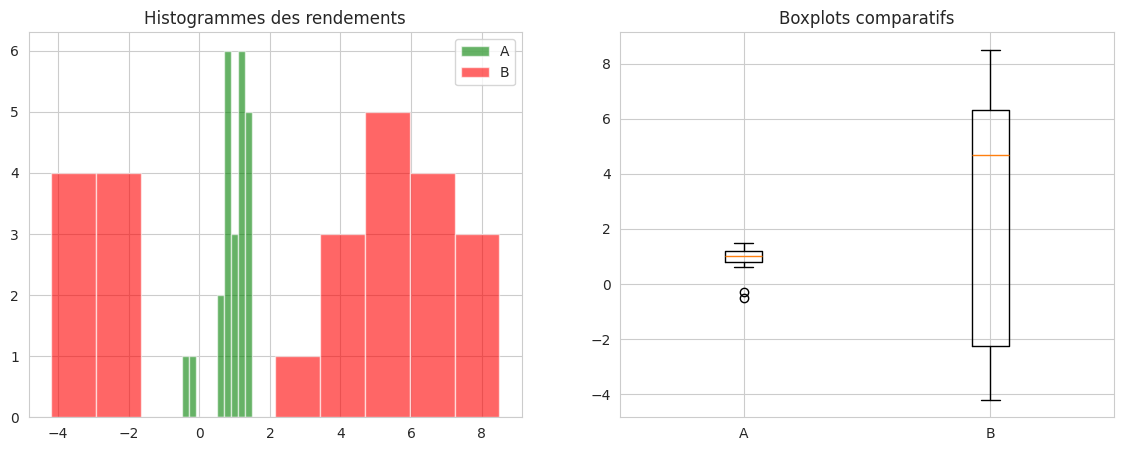

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Histogrammes
ax[0].hist(rendements_A, bins=10, alpha=0.6, label="A", color="green")
ax[0].hist(rendements_B, bins=10, alpha=0.6, label="B", color="red")
ax[0].set_title("Histogrammes des rendements")
ax[0].legend()
ax[0].grid(True)

# Boxplots
ax[1].boxplot([rendements_A, rendements_B], labels=["A", "B"])
ax[1].set_title("Boxplots comparatifs")
ax[1].grid(True)

plt.show()


In [9]:
def var_param(mu, sigma, capital):
    z = stats.norm.ppf(0.05)
    var_pct = mu + z * sigma
    var_euro = capital * var_pct / 100
    return var_pct, var_euro

# VaR A
varA_m, _ = var_param(stats_A[0], stats_A[1], capital)
varA_a, varA_e = var_param(stats_A[3], stats_A[4], capital)

# VaR B
varB_m, _ = var_param(stats_B[0], stats_B[1], capital)
varB_a, varB_e = var_param(stats_B[3], stats_B[4], capital)

print("VaR annuelle A (€):", varA_e)
print("VaR annuelle B (€):", varB_e)

# Test normalité
print("Shapiro A:", stats.shapiro(rendements_A))
print("Shapiro B:", stats.shapiro(rendements_B))


VaR annuelle A (€): 45649.37914570175
VaR annuelle B (€): 77230.68488709879
Shapiro A: ShapiroResult(statistic=np.float64(0.803209338591415), pvalue=np.float64(0.0003325496638095976))
Shapiro B: ShapiroResult(statistic=np.float64(0.8365521747567006), pvalue=np.float64(0.001242967311174172))


In [10]:
sharpe_A = (stats_A[3]/100 - rf) / (stats_A[4]/100)
sharpe_B = (stats_B[3]/100 - rf) / (stats_B[4]/100)

print("Sharpe A:", sharpe_A)
print("Sharpe B:", sharpe_B)


Sharpe A: 5.353494544180065
Sharpe B: 2.452723014230025


In [11]:
prior = 0.05
p_ret_def = 0.80
p_ret_non = 0.10

p_ret = p_ret_def * prior + p_ret_non * (1 - prior)
posterior = (p_ret_def * prior) / p_ret

print("P(Défaut | Retard) =", posterior)
print("Facteur d’augmentation =", posterior / prior)


P(Défaut | Retard) = 0.29629629629629634
Facteur d’augmentation = 5.9259259259259265


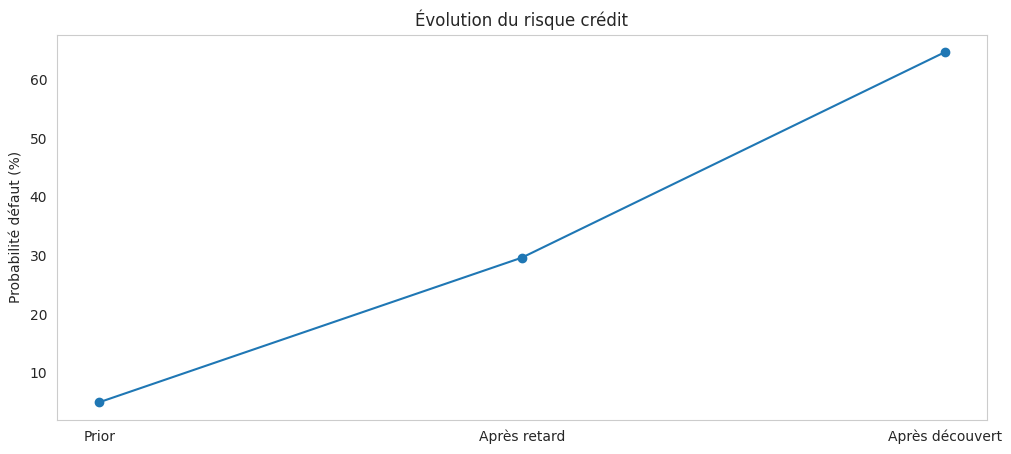

In [12]:
p_dec_def = 0.65
p_dec_non = 0.15

p_dec = p_dec_def * posterior + p_dec_non * (1 - posterior)
posterior2 = (p_dec_def * posterior) / p_dec

etapes = ["Prior", "Après retard", "Après découvert"]
probas = [prior*100, posterior*100, posterior2*100]

plt.plot(etapes, probas, marker='o')
plt.ylabel("Probabilité défaut (%)")
plt.title("Évolution du risque crédit")
plt.grid()
plt.show()


In [13]:
def bayes_update(prior, p_e_def, p_e_non):
    p_e = p_e_def * prior + p_e_non * (1 - prior)
    return (p_e_def * prior) / p_e

# Test segment Risque
p = 0.15
p = bayes_update(p, 0.80, 0.10)
p = bayes_update(p, 0.65, 0.15)
p = bayes_update(p, 0.55, 0.08)

print("Probabilité finale défaut :", p)


Probabilité finale défaut : 0.976775956284153


In [14]:
TP = 400
FP = 950

precision = TP / (TP + FP)
print("Precision =", precision)


Precision = 0.2962962962962963


In [16]:
df.describe()
df['defaut'].mean()
df['defaut'].value_counts()

corr = df.corr()['defaut'].sort_values()
corr


,defaut
salaire,-0.090867
score_credit_bureau,-0.054215
age,0.009161
nb_credits_actifs,0.039051
anciennete_emploi,0.043493
historique_retards,0.069317
dette_totale,0.111583
ratio_dette_revenu,0.123795
defaut,1.000000


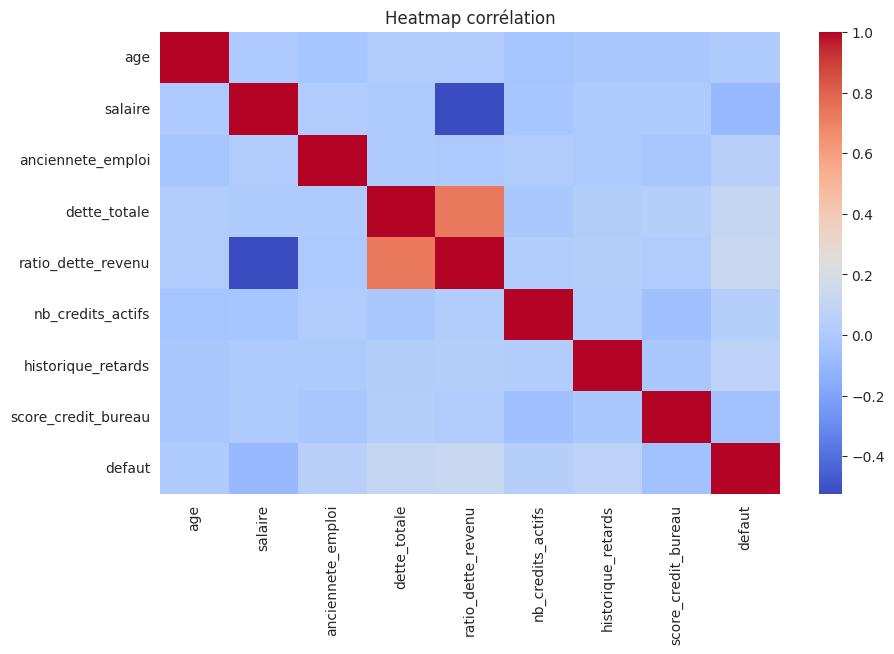

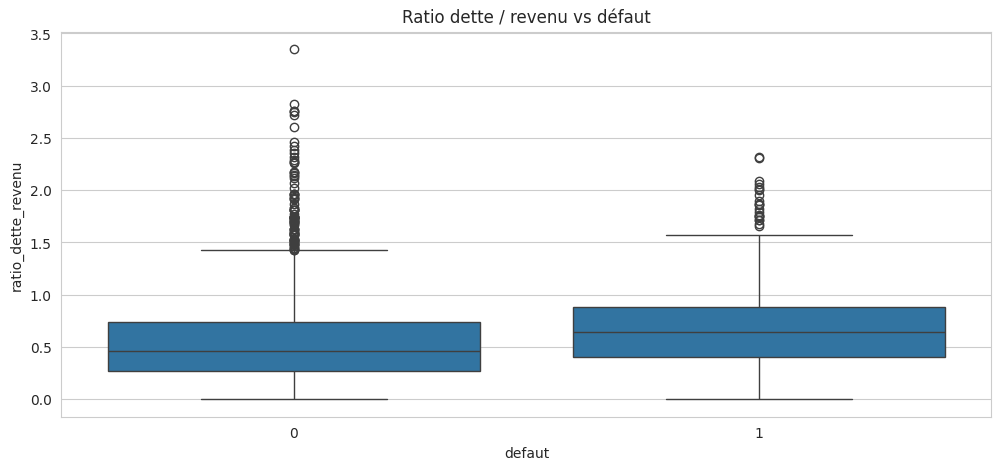

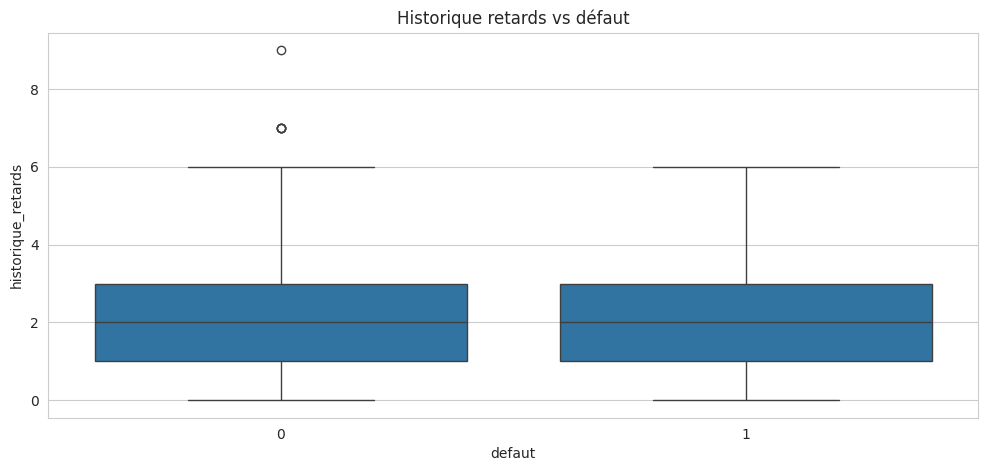

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Heatmap corrélation")
plt.show()

sns.boxplot(x='defaut', y='ratio_dette_revenu', data=df)
plt.title("Ratio dette / revenu vs défaut")
plt.show()

sns.boxplot(x='defaut', y='historique_retards', data=df)
plt.title("Historique retards vs défaut")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('defaut', axis=1)
y = df['defaut']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train size :", X_train.shape)
print("Test size :", X_test.shape)
print("Taux défaut train :", y_train.mean())
print("Taux défaut test :", y_test.mean())


Train size : (1400, 8)
Test size : (600, 8)
Taux défaut train : 0.16714285714285715
Taux défaut test : 0.16666666666666666


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

K_values = [1,3,5,7,9,11,15,20,25,30]
results = []

for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    auc = cross_val_score(knn, X_train_scaled, y_train,
                          cv=5, scoring='roc_auc')
    recall = cross_val_score(knn, X_train_scaled, y_train,
                             cv=5, scoring='recall')
    precision = cross_val_score(knn, X_train_scaled, y_train,
                                cv=5, scoring='precision')

    results.append({
        'K': k,
        'AUC_mean': auc.mean(),
        'AUC_std': auc.std(),
        'Recall_mean': recall.mean(),
        'Precision_mean': precision.mean()
    })

results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

,K,AUC_mean,AUC_std,Recall_mean,Precision_mean
0,1,0.520277,0.024799,0.200925,0.198250
1,3,0.514504,0.028428,0.076966,0.175391
2,5,0.526775,0.016144,0.047179,0.179048
3,7,0.528160,0.017232,0.017206,0.120238
4,9,0.536740,0.023353,0.025717,0.340000
5,11,0.544011,0.021034,0.017114,0.383333
6,15,0.560310,0.040568,0.004255,0.100000
7,20,0.585049,0.051706,0.008511,0.133333
8,25,0.594307,0.040745,0.004255,0.100000
9,30,0.600152,0.052911,0.000000,0.000000


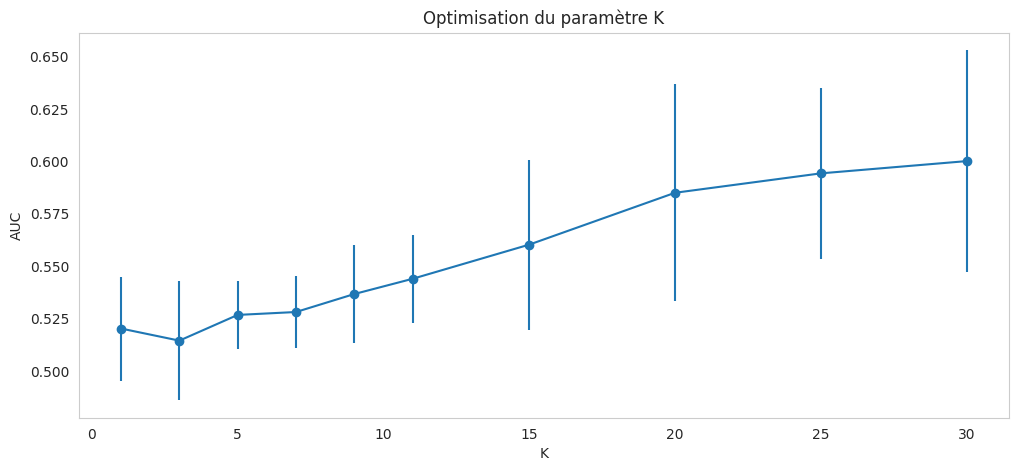

K optimal = 30


In [21]:
plt.errorbar(results_df['K'], results_df['AUC_mean'],
             yerr=results_df['AUC_std'], marker='o')
plt.xlabel("K")
plt.ylabel("AUC")
plt.title("Optimisation du paramètre K")
plt.grid()
plt.show()

K_opt = results_df.loc[results_df['AUC_mean'].idxmax(), 'K']
print("K optimal =", K_opt)


In [22]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)

knn_final = KNeighborsClassifier(n_neighbors=int(K_opt))
knn_final.fit(X_train_scaled, y_train)

y_pred = knn_final.predict(X_test_scaled)
y_proba = knn_final.predict_proba(X_test_scaled)[:,1]

cm = confusion_matrix(y_test, y_pred)
cm


array([[499,   1],
       [100,   0]])